In [2]:
import pandas as pd
import numpy as np
from km import KMeans
from SVD import Matrix
import matplotlib.pyplot as plt
import math

In [29]:
def load_data(file_path):
    return pd.read_csv(file_path)


In [112]:
file_path = "./EncodedCombined2.csv"  # Replace with your dataset file path
data = load_data(file_path)

avg_rating = load_data("./Movie_Rating.csv")
# Assuming the data matrix is constructed with users as rows and movies as columns
data_matrix = data.iloc[:601, :]  # Exclude first column (user IDs)
# data_matrix.drop(columns=["Zip-code","Title"],inplace=True)
print(data_matrix)


     UserID  MovieID  Rating  Action  Adventure  Animation  Children's  \
0         1     1193       5       0          0          0           0   
1         1      661       3       0          0          1           1   
2         1      914       3       0          0          0           0   
3         1     3408       4       0          0          0           0   
4         1     2355       5       0          0          1           1   
..      ...      ...     ...     ...        ...        ...         ...   
596      17     2010       4       0          0          0           0   
597      17     3827       4       1          0          0           0   
598      17      610       4       1          1          1           0   
599      17     1077       5       0          0          0           0   
600      17     2526       2       0          0          0           0   

     Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  Sci-Fi  \
0         0      0            0  ...

In [17]:
data_matrix["MovieID"]=data_matrix["MovieID"].astype(np.int16)
data_matrix["UserID"]=data_matrix["UserID"].astype(np.int16)
for col in data_matrix.columns:
    if(col!="MovieID" and col!="UserID"):
        data_matrix[col]=data_matrix[col].astype(np.int8)
print(data_matrix.dtypes)

UserID         int16
MovieID        int16
Rating          int8
Action          int8
Adventure       int8
Animation       int8
Children's      int8
Comedy          int8
Crime           int8
Documentary     int8
Drama           int8
Fantasy         int8
Film-Noir       int8
Horror          int8
Musical         int8
Mystery         int8
Romance         int8
Sci-Fi          int8
Thriller        int8
War             int8
Western         int8
Gender          int8
Age             int8
Occupation      int8
dtype: object


C:\Users\kalya\AppData\Local\Temp\ipykernel_19400\3270383453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix["MovieID"]=data_matrix["MovieID"].astype(np.int16)
C:\Users\kalya\AppData\Local\Temp\ipykernel_19400\3270383453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matrix["UserID"]=data_matrix["UserID"].astype(np.int16)
C:\Users\kalya\AppData\Local\Temp\ipykernel_19400\3270383453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [18]:
user_ids = set(data_matrix['UserID'])
user_ids

{1, 2, 12, 15, 17}

In [20]:
def get_non_zero_eigenvalues(Sigma):
    # Extract diagonal elements of Sigma
    diagonal_elements = np.diag(Sigma)

    # Filter out values not close to zero
    non_zero_eigenvalues = [eigenvalue for eigenvalue in diagonal_elements if not math.isclose(eigenvalue, 0)]

    return non_zero_eigenvalues


In [113]:
avgdict = avg_rating.set_index('MovieID')['AvgRating'].to_dict()
avg_dict = {int(key): float(value)  for key, value in avgdict.items() if value != 'Avg. Rating'}

A = data_matrix.pivot(index='UserID', columns='MovieID', values='Rating')
A_mat = pd.DataFrame(A)
A_watched=A_mat.copy()
# print(avg_dict)
A_mat= A_mat.fillna(avg_dict)
print(A)

MovieID  1     6     21    24    30    32    34    47    48    50    ...  \
UserID                                                               ...   
1         5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN  ...   
2         NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
12        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
15        NaN   4.0   NaN   NaN   NaN   3.0   NaN   4.0   NaN   4.0  ...   
17        NaN   NaN   NaN   3.0   5.0   5.0   5.0   NaN   NaN   5.0  ...   

MovieID  3793  3798  3809  3827  3863  3879  3893  3897  3932  3948  
UserID                                                               
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   3.0   NaN   NaN   NaN   1.0   NaN   NaN   NaN  
12        NaN   NaN   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN  
15        NaN   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0  
17        4.0   NaN   NaN   4.0   3.0   4.0   N

In [114]:
A_mat=A_mat.round(2)
# print(A_mat.dtypes)
A_mat,A_watched

(MovieID  1     6     21    24    30    32    34    47    48    50    ...  \
 UserID                                                               ...   
 1        5.00  3.88  3.62  3.18  3.65  3.95  3.89  4.11  5.00  4.52  ...   
 2        4.15  3.88  1.00  3.18  3.65  3.95  3.89  4.11  2.98  4.52  ...   
 12       4.15  3.88  3.62  3.18  3.65  3.95  3.89  4.11  2.98  4.52  ...   
 15       4.15  4.00  3.62  3.18  3.65  3.00  3.89  4.00  2.98  4.00  ...   
 17       4.15  3.88  3.62  3.00  5.00  5.00  5.00  4.11  2.98  5.00  ...   
 
 MovieID  3793  3798  3809  3827  3863  3879  3893  3897  3932  3948  
 UserID                                                               
 1        3.82  3.33   3.4  3.38  3.26  2.78   3.5  4.23  3.75  3.64  
 2        3.82  3.33   3.0  3.38  3.26  2.78   1.0  4.23  3.75  3.64  
 12       3.82  3.33   3.4  3.38  3.26  2.78   3.5  4.00  3.75  3.64  
 15       3.82  4.00   3.4  3.38  3.26  2.78   3.5  4.23  3.75  3.00  
 17       4.00  3.33   3.4  4.00 

In [10]:
A = Matrix(A_mat)
U,Sigma,V = A.svd()

non_zero_diag = get_non_zero_eigenvalues(Sigma)
U_red,Sigma_red,V_red = A.reduced_svd(int(non_zero_diag[0]))  # Number of components for SVD 


Outputs

[[ 0.44796203  0.0765868  -0.03372895 -0.65913104  0.59822496]
 [ 0.4438013   0.26707676 -0.74511582  0.41703214  0.05096104]
 [ 0.44347592  0.08266164  0.01046565 -0.40927531 -0.79301977]
 [ 0.43375174 -0.86872985  0.07487523  0.22396898  0.03740949]
 [ 0.46643217  0.40159677  0.66177711  0.41708763  0.0961771 ]]
[[178.09312577   0.           0.         ...   0.           0.
    0.        ]
 [  0.          10.93699664   0.         ...   0.           0.
    0.        ]
 [  0.           0.          10.2891871  ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]
[[-0.05422878  0.00953223  0.01558294 ... -0.00890753 -0.02020739
  -0.02591774]
 [-0.04899399  0.02400862  0.01109076 ... -0.0423631   0.00091034
  -0.00893261]
 [-0.03890926  0.07748614 -0.1785712  ... -0.17159565 -0.08639066
   0.00284551]
 ...
 [-0.05252219  0.01752122  0.0

In [11]:
def elbow_method(data, max_clusters=4):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(i)
        km.fit(data)
        distortions.append(km.get_cost())
    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# Assuming your data is in V_red_T
# Perform Elbow Method
new_mat = (U_red.dot(Sigma)).dot(V_red)
new_mat

array([[-4.29606336e+00,  5.53892149e-01,  9.83883767e-01,
         5.87140651e+00, -7.71826940e+00,  3.15296410e+00,
         2.23794118e+00, -5.56237195e+00,  5.95588841e+00,
        -3.63789028e+00,  5.12099370e+00,  5.99931191e+00,
        -2.99631925e+00, -1.21962957e+00, -6.94049558e-01,
        -1.82568037e+00, -5.29844315e-01, -1.41778382e+00,
         6.95661164e+00, -4.36379056e+00,  1.28034523e+00,
         2.07174523e+00, -1.07459553e+00,  3.84861225e+00,
         8.41685103e+00, -1.14787232e+00,  9.67085796e-01,
         6.06280367e-01,  3.14417821e-01,  1.07512058e+01,
        -1.13397725e+01, -2.27229134e+00,  3.97202668e+00,
        -8.44903098e+00, -2.28780099e+00, -5.01021523e+00,
         2.73891399e+00, -1.44380388e+01,  1.59302968e+00,
         8.59634277e+00, -5.03776619e+00, -2.30120430e-01,
        -2.54800296e+00,  5.65113752e+00,  4.27622749e+00,
        -4.99759947e+00,  2.14164882e+00,  8.46322819e-01,
        -5.76229133e+00,  6.86429721e+00, -4.62405729e+0

sample_points_ids
[2]
the tuples
(-4.0146682178112565, 0.86349739377001, 1.4464769238153234, 6.362252848901389, -7.477334782081693, 2.945505642152756, 2.2989529250831398, -5.344516801870551, 5.475570235049911, -2.813886645652724, 4.616142310025496, 5.84454387384824, -3.3459406460094, -1.9074224900327688, -1.0650962910425703, -2.224886939884592, -0.08133351042792863, -0.9650995281747049, 7.8153071465351776, -4.2914818824729855, 1.2189521673105221, 1.5929181311815006, -0.7625382079225598, 4.221845135304416, 8.500539909420176, -0.8126813481187325, 0.6830581792372332, 0.5350608132910709, 0.8711358839368307, 10.656533820466933, -10.94257067783201, -2.0099748754155815, 3.462831891142922, -7.961611937910023, -1.6777856720749404, -4.718895707681127, 2.6021768750786958, -14.667433660815721, 2.018439106777398, 8.266983864256249, -4.609337043873881, -0.4447247196835083, -1.8399631981805427, 6.355671657091773, 4.292244179539674, -4.592763083962281, 2.494439480008533, 0.4449607677074841, -5.5831770

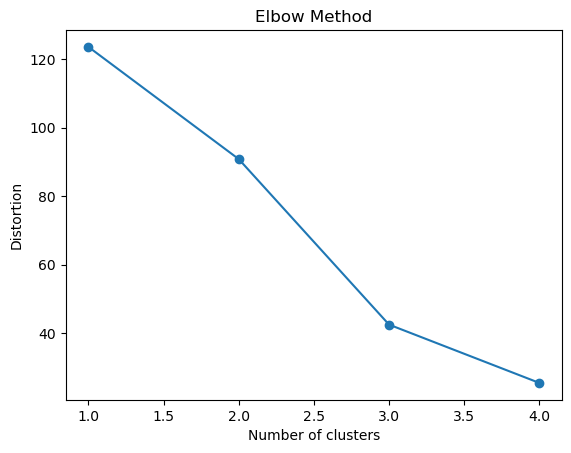

In [12]:
elbow_method(new_mat)

In [24]:
km = KMeans(4)
km.fit(new_mat)

sample_points_ids
[2, 0, 4, 1]
the tuples
(-4.0146682178112565, 0.86349739377001, 1.4464769238153234, 6.362252848901389, -7.477334782081693, 2.945505642152756, 2.2989529250831398, -5.344516801870551, 5.475570235049911, -2.813886645652724, 4.616142310025496, 5.84454387384824, -3.3459406460094, -1.9074224900327688, -1.0650962910425703, -2.224886939884592, -0.08133351042792863, -0.9650995281747049, 7.8153071465351776, -4.2914818824729855, 1.2189521673105221, 1.5929181311815006, -0.7625382079225598, 4.221845135304416, 8.500539909420176, -0.8126813481187325, 0.6830581792372332, 0.5350608132910709, 0.8711358839368307, 10.656533820466933, -10.94257067783201, -2.0099748754155815, 3.462831891142922, -7.961611937910023, -1.6777856720749404, -4.718895707681127, 2.6021768750786958, -14.667433660815721, 2.018439106777398, 8.266983864256249, -4.609337043873881, -0.4447247196835083, -1.8399631981805427, 6.355671657091773, 4.292244179539674, -4.592763083962281, 2.494439480008533, 0.4449607677074841, -

In [109]:
# Recommend movies for a particular user
def recommend_movies(user_id, data,users_watched,user_idx,cluster_labels):
    user_cluster = cluster_labels[user_idx[user_id]]
    # print(user_cluster)
    cluser_users = []
    for row,cluster in cluster_labels.items():
        if cluster == user_cluster and row!=user_idx[user_id]:
            cluser_users.append(users_watched.iloc[row]) 
    rating_movie = {}
    movie_rating_count={}
    for df in cluser_users:
        for key,value in df[df.notnull()].items():
            if int(key) not in rating_movie:
                rating_movie[int(key)] = 0
                movie_rating_count[int(key)] = 0
            
            rating_movie[int(key)]+=float(value)
            movie_rating_count[int(key)]+=1

    for key,value in movie_rating_count.items():
        if(value>0):
            rating_movie[key]=rating_movie[key]/float(value)

    final_list = sorted(rating_movie.items(), key=lambda x: x[1],reverse=True)

    # print(final_list)
    movies=pd.read_csv("movies.csv")
    movies=movies.set_index(keys=['MovieID'])
    recommendations=[]
    for x in final_list:
        movie=movies.loc[x[0]]
        recommendations.append([x[0],x[1],movie['Title'],movie['Genres']])

    return recommendations

In [110]:
cluster_labels = km.get_pointCluster()

user_index = {}
i =0
for x in user_ids:
    user_index[int(x)] = i 
    i+=1

print(f"Cluster Labels: {cluster_labels}")
print(f"User_Index : {user_index}")
# User ID for which we want to recommend movies
user_id = 12  # Replace with the desired user ID

# Recommend movies for the user
recommended_movies = recommend_movies(user_id, A_mat,A_watched,user_index,cluster_labels)
print("Recommended movies for User", user_id)
for movie in recommended_movies[:5]:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles


Cluster Labels: {0: 1, 1: 3, 2: 0, 3: 0, 4: 2}
User_Index : {1: 0, 2: 1, 12: 2, 15: 3, 17: 4}
Recommended movies for User 12
Title : Braveheart (1995) , MovieID : 110 , Rating : 5.0 , Genres : Action|Drama|War
Title : Frequency (2000) , MovieID : 3510 , Rating : 5.0 , Genres : Drama|Thriller
Title : Gladiator (2000) , MovieID : 3578 , Rating : 5.0 , Genres : Action|Drama
Title : Patriot, The (2000) , MovieID : 3753 , Rating : 5.0 , Genres : Action|Drama|War
Title : Heat (1995) , MovieID : 6 , Rating : 4.0 , Genres : Action|Crime|Thriller
